In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
from matplotlib.pyplot import rc_context
import sklearn.preprocessing as pp
seed_value = 0
os.environ['PYTHONHASHSEED']=str(seed_value)

import random
random.seed(seed_value)
np.random.seed(seed_value)

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = 'Arial'

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=50, dpi_save=300, figsize=(8,8))

scanpy==1.9.2 anndata==0.10.9 umap==0.5.3 numpy==1.26.4 scipy==1.11.4 pandas==1.5.0 scikit-learn==1.2.0 statsmodels==0.13.5 python-igraph==0.11.6 pynndescent==0.5.8


# data link
Yao, Z., van Velthoven, C.T.J., Kunst, M. et al. A high-resolution transcriptomic and spatial atlas of cell types in the whole mouse brain. Nature 624, 317–332 (2023). https://doi.org/10.1038/s41586-023-06812-z

In [2]:
import h5py

adata1 = h5py.File('./expression_matrix.hdf5', 'r')
print(adata1['data'].keys())

<KeysViewHDF5 ['counts', 'gene', 'samples', 'shape']>


In [3]:
labels = pd.read_csv('./expression_metadata.csv', sep=',', index_col=0)
print(len(labels.columns), labels.columns)
print(print(labels['region_label'].value_counts()))
labels

56 Index(['donor_sex_id', 'donor_sex_label', 'donor_sex_color', 'region_id',
       'region_label', 'region_color', 'platform_label', 'cluster_order',
       'cluster_label', 'cluster_color', 'subclass_order', 'subclass_label',
       'subclass_color', 'neighborhood_id', 'neighborhood_label',
       'neighborhood_color', 'class_order', 'class_label', 'class_color',
       'exp_component_name', 'external_donor_name_label',
       'full_genotype_label', 'facs_population_plan_label',
       'injection_roi_label', 'injection_materials_label',
       'injection_method_label', 'injection_type_label', 'full_genotype_id',
       'full_genotype_color', 'external_donor_name_id',
       'external_donor_name_color', 'facs_population_plan_id',
       'facs_population_plan_color', 'injection_materials_id',
       'injection_materials_color', 'injection_method_id',
       'injection_method_color', 'injection_roi_id', 'injection_roi_color',
       'injection_type_id', 'injection_type_color',
       'c

,donor_sex_id,donor_sex_label,donor_sex_color,region_id,region_label,region_color,platform_label,cluster_order,cluster_label,cluster_color,...,cell_type_alt_alias_id,cell_type_alias_id,cell_type_accession_id,cell_type_designation_color,cell_type_alt_alias_color,cell_type_alias_color,cell_type_accession_color,cortical_layer_label,cortical_layer_order,cortical_layer_color
sample_name,,,,,,,,,,,,,,,,,,,,,
ACGCAGCAGACCGGAT-L8TX_180221_01_C11,2,M,#ADC4C3,20,RSP,#2B9EAD,10X,116,116_Pvalb,#EC2D46,...,116,116,116,#EC2D46,#EC2D46,#EC2D46,#EC2D46,NaN,1,#FF7373
CCATGTCAGCGCTTAT-L8TX_180221_01_C11,2,M,#ADC4C3,20,RSP,#2B9EAD,10X,364,364_DG,#413BE2,...,364,364,364,#413BE2,#413BE2,#413BE2,#413BE2,NaN,1,#FF7373
GCGCAGTAGTGTCTCA-L8TX_180712_01_H05,2,M,#ADC4C3,21,TEa-PERI-ECT,#76CBE2,10X,18,18_Lamp5,#D97C80,...,18,18,18,#D97C80,#D97C80,#D97C80,#D97C80,NaN,1,#FF7373
GTCACGGCACCAACCG-L8TX_180712_01_H05,2,M,#ADC4C3,21,TEa-PERI-ECT,#76CBE2,10X,15,15_Lamp5,#A6666F,...,15,15,15,#A6666F,#A6666F,#A6666F,#A6666F,NaN,1,#FF7373
ATTGGACTCGATCCCT-L8TX_180712_01_A06,2,M,#ADC4C3,21,TEa-PERI-ECT,#76CBE2,10X,18,18_Lamp5,#D97C80,...,18,18,18,#D97C80,#D97C80,#D97C80,#D97C80,NaN,1,#FF7373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCACCACCT-L8TX_180115_01_E08,2,M,#ADC4C3,1,VISp,#9299FF,10X,59,59_Vip Igfbp6,#CD6DF2,...,59,59,59,#CD6DF2,#CD6DF2,#CD6DF2,#CD6DF2,NaN,1,#FF7373
TTTGTCATCCCAAGTA-L8TX_180115_01_E08,2,M,#ADC4C3,1,VISp,#9299FF,10X,168,168_L2/3 IT CTX,#02F970,...,168,168,168,#02F970,#02F970,#02F970,#02F970,NaN,1,#FF7373
TTTGTCATCCTCAACC-L8TX_180115_01_E08,2,M,#ADC4C3,1,VISp,#9299FF,10X,168,168_L2/3 IT CTX,#02F970,...,168,168,168,#02F970,#02F970,#02F970,#02F970,NaN,1,#FF7373


In [4]:
df = labels[labels['region_label'] == 'MOs_FRP']#.to_csv('./MOs_FRp_labels.csv', sep=',')
# df = df[df['neighborhood_label'] == 'L4/5/6 IT Car3']
df

,donor_sex_id,donor_sex_label,donor_sex_color,region_id,region_label,region_color,platform_label,cluster_order,cluster_label,cluster_color,...,cell_type_alt_alias_id,cell_type_alias_id,cell_type_accession_id,cell_type_designation_color,cell_type_alt_alias_color,cell_type_alias_color,cell_type_accession_color,cortical_layer_label,cortical_layer_order,cortical_layer_color
sample_name,,,,,,,,,,,,,,,,,,,,,
CTAGCCTAGCGTAATA-L8TX_181206_01_A12,2,M,#ADC4C3,13,MOs_FRP,#F15A29,10X,18,18_Lamp5,#D97C80,...,18,18,18,#D97C80,#D97C80,#D97C80,#D97C80,NaN,1,#FF7373
AGAATAGAGCTACCTA-L8TX_181206_01_B12,2,M,#ADC4C3,13,MOs_FRP,#F15A29,10X,15,15_Lamp5,#A6666F,...,15,15,15,#A6666F,#A6666F,#A6666F,#A6666F,NaN,1,#FF7373
ACCTTTAGTCACAAGG-L8TX_181206_01_C12,1,F,#565353,13,MOs_FRP,#F15A29,10X,18,18_Lamp5,#D97C80,...,18,18,18,#D97C80,#D97C80,#D97C80,#D97C80,NaN,1,#FF7373
CGGTTAAAGATAGGAG-L8TX_181206_01_C12,1,F,#565353,13,MOs_FRP,#F15A29,10X,18,18_Lamp5,#D97C80,...,18,18,18,#D97C80,#D97C80,#D97C80,#D97C80,NaN,1,#FF7373
CACCAGGCACGGTAGA-L8TX_181206_01_D12,1,F,#565353,13,MOs_FRP,#F15A29,10X,18,18_Lamp5,#D97C80,...,18,18,18,#D97C80,#D97C80,#D97C80,#D97C80,NaN,1,#FF7373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTTCAGACT-L8TX_181206_01_E12,1,F,#565353,13,MOs_FRP,#F15A29,10X,290,290_L6 CT CTX,#3E98A5,...,290,290,290,#3E98A5,#3E98A5,#3E98A5,#3E98A5,NaN,1,#FF7373
TTTGTCATCGCAGGCT-L8TX_181206_01_E12,1,F,#565353,13,MOs_FRP,#F15A29,10X,168,168_L2/3 IT CTX,#02F970,...,168,168,168,#02F970,#02F970,#02F970,#02F970,NaN,1,#FF7373
TTTGTCATCGGAGGTA-L8TX_181206_01_E12,1,F,#565353,13,MOs_FRP,#F15A29,10X,187,187_L4/5 IT CTX,#07C6D9,...,187,187,187,#07C6D9,#07C6D9,#07C6D9,#07C6D9,NaN,1,#FF7373


In [5]:
# sele_list = []
# for i in df['cluster_label'].unique():
#     if i.find('IT') == -1:
#         continue
#     if i.find('L5')>-1:
#         sele_list.append(i)
#     elif i.find('L4/5') > -1:
#         sele_list.append(i)
#     elif i.find('L5/6') > -1:
#         sele_list.append(i)

In [6]:
# sele_list

In [7]:
# df = df[df['cluster_label'].isin(sele_list)]
# df

In [8]:
# labels_sampled = None
# for i in labels.region_label.unique():
#     tmp = labels[labels.region_label == i].sample(3000, random_state=0)
#     if labels_sampled is None:
#         labels_sampled = tmp
        
#     else:
#         labels_sampled = pd.concat([labels_sampled, tmp], axis=0)
# labels_sampled

In [9]:
# labels = labels[labels.neighborhood_label=='L4/5/6 IT Car3']

# sele_label_list = []
# for i in labels.cluster_label.unique():
#     if i.count('L5') or i.count('/5'):
#         sele_label_list.append(i)
        
# labels = labels[labels.cluster_label.isin(sele_label_list)]
# labels

In [10]:
np.array(adata1['data']['samples'])

/tmp/ipykernel_4959/2491617508.py:1: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  np.array(adata1['data']['samples'])


array([b'AAACCTGAGAAACGCC-L8TX_180221_01_F09',
       b'AAACCTGAGAAGGTTT-L8TX_180221_01_F09',
       b'AAACCTGAGAGTAATC-L8TX_180221_01_F09', ...,
       b'TTTGTCAGTGAGGCTA-L8TX_200611_02_A05',
       b'TTTGTCATCAGGCGAA-L8TX_200611_02_A05',
       b'TTTGTCATCGTCTGAA-L8TX_200611_02_A05'], dtype='|S36')

In [11]:
cell_df = pd.DataFrame({'cells':np.array(adata1['data']['samples'])})
cell_df['cells'] = cell_df['cells'].apply(lambda r: r.decode('utf-8'))
cell_df = cell_df[cell_df.cells.isin(df.index.tolist())]
cell_df

/tmp/ipykernel_4959/1700752136.py:1: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  cell_df = pd.DataFrame({'cells':np.array(adata1['data']['samples'])})


,cells
497386,AAACCTGAGATGTTAG-L8TX_181206_01_H11
497387,AAACCTGAGGCCGAAT-L8TX_181206_01_H11
497388,AAACCTGGTAGAGCTG-L8TX_181206_01_H11
497389,AAACCTGGTCACTTCC-L8TX_181206_01_H11
497390,AAACCTGGTGATAAAC-L8TX_181206_01_H11
...,...
531712,TTTGTCAGTTCAGACT-L8TX_181206_01_E12
531713,TTTGTCATCGCAGGCT-L8TX_181206_01_E12
531714,TTTGTCATCGGAGGTA-L8TX_181206_01_E12
531715,TTTGTCATCTACCAGA-L8TX_181206_01_E12


In [12]:
gene_df = pd.DataFrame({'gene':np.array(adata1['data']['gene'])})
gene_df['gene'] = gene_df['gene'].apply(lambda r: r.decode('utf-8'))
gene_df


/tmp/ipykernel_4959/3310915731.py:1: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  gene_df = pd.DataFrame({'gene':np.array(adata1['data']['gene'])})


,gene
0,Xkr4
1,Gm1992
2,Gm37381
3,Rp1
4,Sox17
...,...
31048,AC168977.1
31049,AC149090.1
31050,CAAA01118383.1
31051,Vmn2r122


In [13]:
# counts = adata1['data']['counts']
# print(counts[0:10].shape)
# counts[0:10]

In [14]:
index_list = cell_df.index.tolist()
print(index_list[0:10])
cell_df[cell_df.cells.isin(labels.index.tolist())]

[497386, 497387, 497388, 497389, 497390, 497391, 497392, 497393, 497394, 497395]


,cells
497386,AAACCTGAGATGTTAG-L8TX_181206_01_H11
497387,AAACCTGAGGCCGAAT-L8TX_181206_01_H11
497388,AAACCTGGTAGAGCTG-L8TX_181206_01_H11
497389,AAACCTGGTCACTTCC-L8TX_181206_01_H11
497390,AAACCTGGTGATAAAC-L8TX_181206_01_H11
...,...
531712,TTTGTCAGTTCAGACT-L8TX_181206_01_E12
531713,TTTGTCATCGCAGGCT-L8TX_181206_01_E12
531714,TTTGTCATCGGAGGTA-L8TX_181206_01_E12
531715,TTTGTCATCTACCAGA-L8TX_181206_01_E12


In [15]:
counts = adata1['data']['counts']

In [16]:
cur_data = counts[:,index_list]
cur_data.shape

(31053, 34331)

In [17]:
adata = sc.AnnData(cur_data.T.astype(float),obs=list(cell_df['cells']),var = list(gene_df['gene']))
adata.var.set_index(0, inplace=True)
adata.obs.set_index(0, inplace=True)
adata.obs_names.name = 'cells'
adata.var_names.name = 'genes'
adata.var_names_make_unique()
adata1.close()
adata

AnnData object with n_obs × n_vars = 34331 × 31053

In [18]:
adata.obs

""
cells
AAACCTGAGATGTTAG-L8TX_181206_01_H11
AAACCTGAGGCCGAAT-L8TX_181206_01_H11
AAACCTGGTAGAGCTG-L8TX_181206_01_H11
AAACCTGGTCACTTCC-L8TX_181206_01_H11
AAACCTGGTGATAAAC-L8TX_181206_01_H11
...
TTTGTCAGTTCAGACT-L8TX_181206_01_E12
TTTGTCATCGCAGGCT-L8TX_181206_01_E12
TTTGTCATCGGAGGTA-L8TX_181206_01_E12


In [19]:
adata.obs['region'] = labels.loc[adata.obs.index ,'region_label']
adata.obs['class_label'] = labels.loc[adata.obs.index ,'class_label']
adata.obs['neighborhood'] = labels.loc[adata.obs.index ,'neighborhood_label']
adata.obs['subclass'] = labels.loc[adata.obs.index ,'subclass_label']
adata.obs['cluster_label'] = labels.loc[adata.obs.index ,'cluster_label']

adata.obs

,region,class_label,neighborhood,subclass,cluster_label
cells,,,,,
AAACCTGAGATGTTAG-L8TX_181206_01_H11,MOs_FRP,Glutamatergic,L2/3 IT,L2/3 IT CTX,167_L2/3 IT CTX
AAACCTGAGGCCGAAT-L8TX_181206_01_H11,MOs_FRP,GABAergic,MGE,Sst,98_Sst
AAACCTGGTAGAGCTG-L8TX_181206_01_H11,MOs_FRP,GABAergic,MGE,Sst,98_Sst
AAACCTGGTCACTTCC-L8TX_181206_01_H11,MOs_FRP,Glutamatergic,L4/5/6 IT Car3,L4/5 IT CTX,191_L4/5 IT CTX
AAACCTGGTGATAAAC-L8TX_181206_01_H11,MOs_FRP,Glutamatergic,L4/5/6 IT Car3,L4/5 IT CTX,191_L4/5 IT CTX
...,...,...,...,...,...
TTTGTCAGTTCAGACT-L8TX_181206_01_E12,MOs_FRP,Glutamatergic,NP/CT/L6b,L6 CT CTX,290_L6 CT CTX
TTTGTCATCGCAGGCT-L8TX_181206_01_E12,MOs_FRP,Glutamatergic,L2/3 IT,L2/3 IT CTX,168_L2/3 IT CTX
TTTGTCATCGGAGGTA-L8TX_181206_01_E12,MOs_FRP,Glutamatergic,L4/5/6 IT Car3,L4/5 IT CTX,187_L4/5 IT CTX


In [20]:
#adata.obs.to_csv('sele_labels.csv', sep=',')


In [21]:
adata

AnnData object with n_obs × n_vars = 34331 × 31053
    obs: 'region', 'class_label', 'neighborhood', 'subclass', 'cluster_label'

In [22]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)


filtered out 7352 genes that are detected in less than 3 cells


In [23]:
adata

AnnData object with n_obs × n_vars = 34331 × 23701
    obs: 'region', 'class_label', 'neighborhood', 'subclass', 'cluster_label', 'n_genes'
    var: 'n_cells'

In [24]:
adata.var['mt'] = adata.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

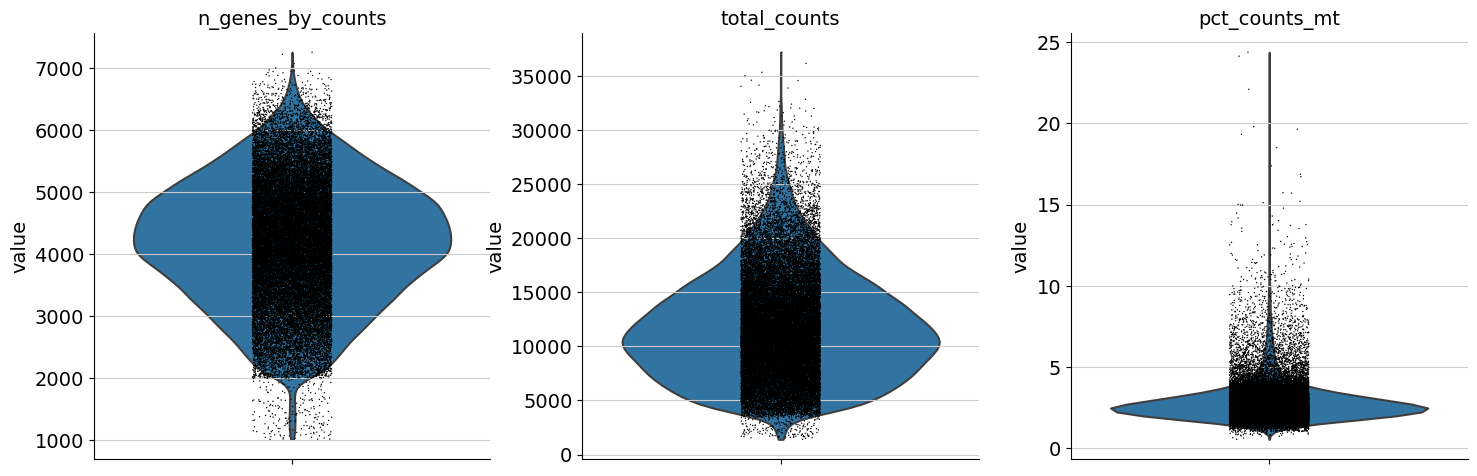

In [25]:
# f,ax = plt.subplots(1,1,figsize=(30,10))
ax = sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=True, multi_panel=True, show=False,
            )
#ax.savefig('./violinplots.jpg', dpi=200)

<AxesSubplot: xlabel='total_counts', ylabel='n_genes_by_counts'>

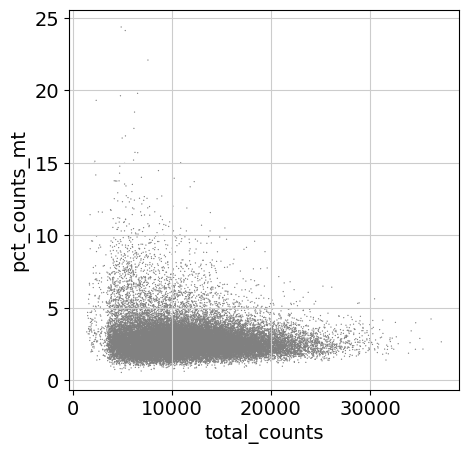

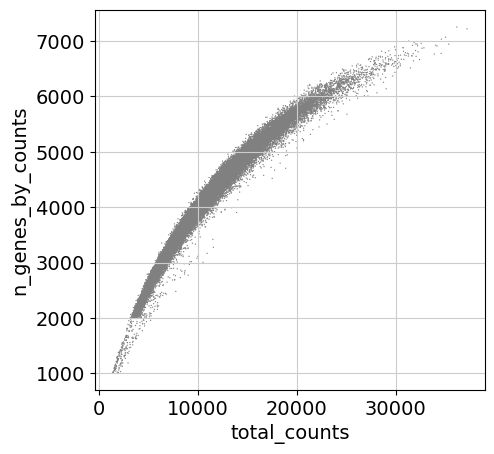

In [26]:
f, ax = plt.subplots(1,1, figsize=(5,5))
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt', show=False, ax=ax)
#plt.savefig('./scatterplot1.jpg', dpi=200)

f, ax = plt.subplots(1,1, figsize=(5,5))
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts', show=False, ax=ax)
#plt.savefig('./scatterplot2.jpg', dpi=200)


In [27]:
adata = adata[adata.obs.n_genes_by_counts < 6000, :]
# adata = adata[adata.obs.pct_counts_mt < 5, :]
adata

View of AnnData object with n_obs × n_vars = 33409 × 23701
    obs: 'region', 'class_label', 'neighborhood', 'subclass', 'cluster_label', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [28]:
sc.pp.normalize_total(adata, target_sum=1e4)


/home/xf/anaconda3/envs/scrna/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)


In [29]:
sc.pp.log1p(adata)


In [30]:
# sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
# sc.pl.highly_variable_genes(adata)


In [31]:
adata.raw = adata


In [32]:
# adata = adata[:, adata.var.highly_variable]
adata.to_df()['Xkr4'].mean()

1.646222111049615

In [33]:
sc.pp.regress_out(adata, ['total_counts',])

regressing out ['total_counts']
    finished (0:08:58)


In [34]:
sc.pp.scale(adata, max_value=10)

In [35]:
#adata.to_df().to_csv('raw_feature.csv', sep=',')

In [36]:
sc.tl.pca(adata, svd_solver='arpack', random_state=0)


computing PCA
    with n_comps=50
    finished (0:01:35)


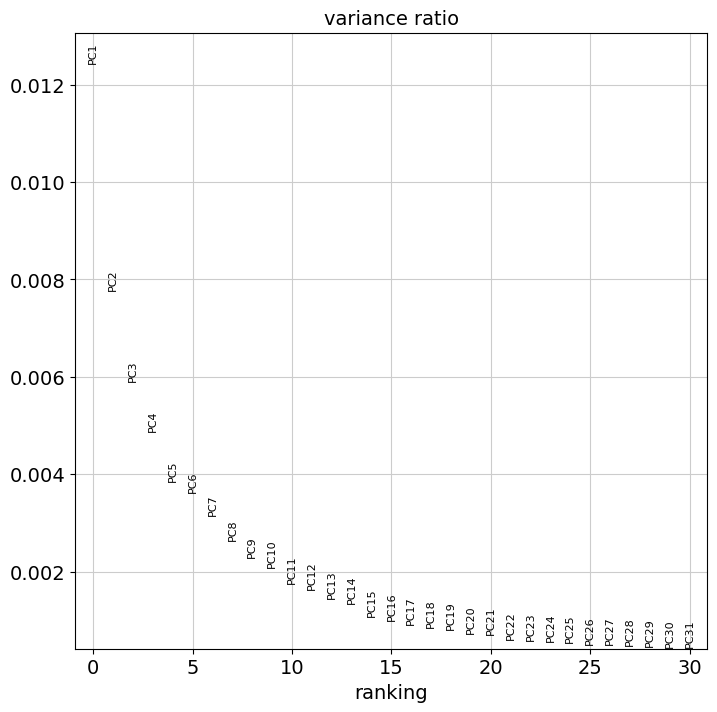

In [37]:
sc.pl.pca_variance_ratio(adata)

In [38]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=50)


computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:17)


In [39]:
# umap-learn : umap(n_nieghnor, )

In [40]:
# sklearn : tsne

In [41]:
# help(sc.pp.neighbors)

In [42]:
sc.tl.umap(adata)


computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:14)


In [43]:
sc.tl.leiden(adata, resolution=0.4)


running Leiden clustering
    finished: found 23 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:06)


/tmp/ipykernel_4959/4025151570.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')
/home/xf/anaconda3/envs/scrna/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


Text(0.5, 1.0, 'whole brain dataset')

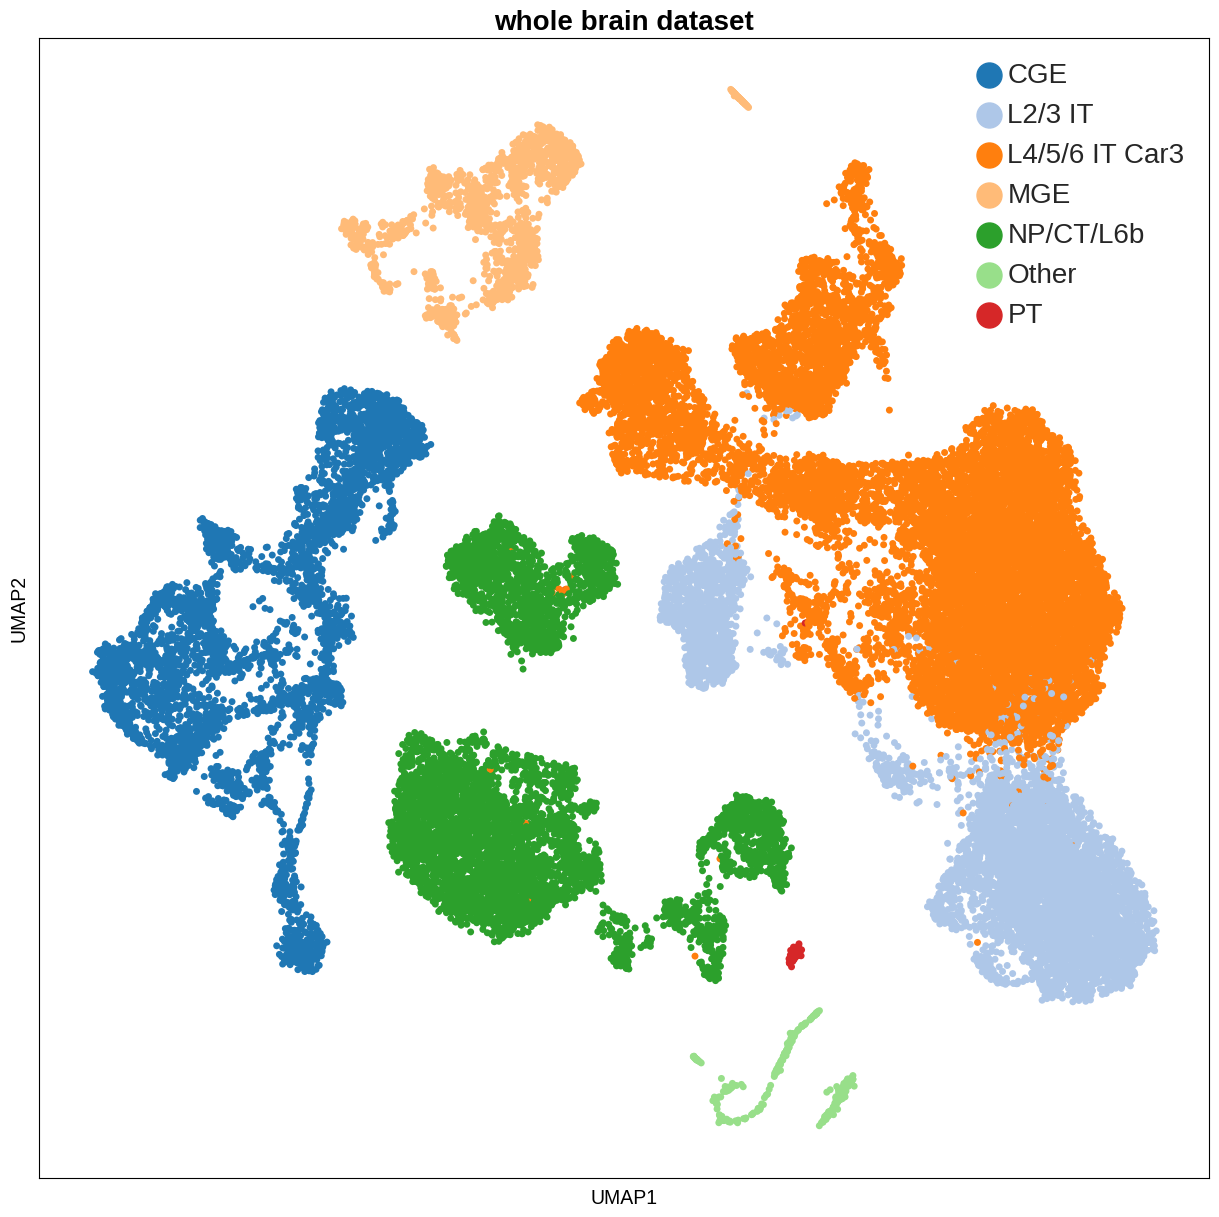

In [44]:
f,ax = plt.subplots(1,1,figsize=(15,15))
plt.style.use('seaborn-white')
sc.pl.umap(adata, color=['neighborhood'], size=50, 
           palette=sns.palettes.color_palette('tab20')+sns.palettes.color_palette('rainbow'),
          legend_fontoutline=1, ax=ax, show=False, legend_fontsize=20,s=100,
          )

plt.legend(markerscale=3, loc='best',fontsize=20)
ax.set_title('whole brain dataset',fontdict={'size':20, 'fontweight':'bold'})
#plt.savefig('./MOs_FRP dataset.png', dpi=200,bbox_inches='tight')

In [2]:
# adata.write('./zeng_PL_ORB.h5ad')
# adata.write('./zeng_MOs_frp_l23.h5ad')


In [2]:
adata = sc.read_h5ad('./zeng_MOsFRP.h5ad')
# adata1 = sc.read_h5ad('./zeng_MOsFRP_L5.h5ad')

# del adata.uns['log1p']
adata

AnnData object with n_obs × n_vars = 33409 × 23701
    obs: 'region', 'class_label', 'neighborhood', 'subclass', 'cluster_label', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mean', 'std'
    uns: 'leiden', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [3]:
adata.obs

,region,class_label,neighborhood,subclass,cluster_label,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden
cells,,,,,,,,,,,
AAACCTGAGATGTTAG-L8TX_181206_01_H11,MOs_FRP,Glutamatergic,L2/3 IT,L2/3 IT CTX,167_L2/3 IT CTX,4745,4745,13068.0,0.0,0.0,1
AAACCTGAGGCCGAAT-L8TX_181206_01_H11,MOs_FRP,GABAergic,MGE,Sst,98_Sst,3956,3956,9761.0,0.0,0.0,8
AAACCTGGTAGAGCTG-L8TX_181206_01_H11,MOs_FRP,GABAergic,MGE,Sst,98_Sst,3554,3554,8226.0,0.0,0.0,8
AAACCTGGTCACTTCC-L8TX_181206_01_H11,MOs_FRP,Glutamatergic,L4/5/6 IT Car3,L4/5 IT CTX,191_L4/5 IT CTX,4874,4874,14888.0,0.0,0.0,0
AAACCTGGTGATAAAC-L8TX_181206_01_H11,MOs_FRP,Glutamatergic,L4/5/6 IT Car3,L4/5 IT CTX,191_L4/5 IT CTX,5839,5839,20886.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTTCAGACT-L8TX_181206_01_E12,MOs_FRP,Glutamatergic,NP/CT/L6b,L6 CT CTX,290_L6 CT CTX,4841,4841,14829.0,0.0,0.0,2
TTTGTCATCGCAGGCT-L8TX_181206_01_E12,MOs_FRP,Glutamatergic,L2/3 IT,L2/3 IT CTX,168_L2/3 IT CTX,5380,5380,19067.0,0.0,0.0,1
TTTGTCATCGGAGGTA-L8TX_181206_01_E12,MOs_FRP,Glutamatergic,L4/5/6 IT Car3,L4/5 IT CTX,187_L4/5 IT CTX,5403,5403,17357.0,0.0,0.0,0


In [4]:
df = adata.raw.to_adata().to_df()
df

genes,Xkr4,Gm1992,Gm37381,Rp1,Mrpl15,Lypla1,Gm37988,Tcea1,Rgs20,Gm16041,...,CR974586.5,AC132444.1,AC132444.5,Csprs,AC132444.6,AC125149.3,AC168977.1,AC149090.1,CAAA01118383.1,CAAA01147332.1
cells,,,,,,,,,,,,,,,,,,,,,
AAACCTGAGATGTTAG-L8TX_181206_01_H11,2.157823,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,1.192614,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.849493,0.56828,0.0
AAACCTGAGGCCGAAT-L8TX_181206_01_H11,2.507103,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,1.404492,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.705315,0.00000,0.0
AAACCTGGTAGAGCTG-L8TX_181206_01_H11,2.372602,0.795549,0.0,0.0,0.0,0.0,0.000000,0.795549,0.795549,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.536216,0.00000,0.0
AAACCTGGTCACTTCC-L8TX_181206_01_H11,2.043402,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.513830,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.304739,0.00000,0.0
AAACCTGGTGATAAAC-L8TX_181206_01_H11,2.041617,0.391224,0.0,0.0,0.0,0.0,0.391224,0.391224,0.391224,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.069924,0.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTTCAGACT-L8TX_181206_01_E12,2.278969,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.515428,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.618621,0.00000,0.0
TTTGTCATCGCAGGCT-L8TX_181206_01_E12,0.945228,0.000000,0.0,0.0,0.0,0.0,0.000000,0.421644,1.744003,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.647837,0.00000,0.0
TTTGTCATCGGAGGTA-L8TX_181206_01_E12,1.356011,0.000000,0.0,0.0,0.0,0.0,0.454977,0.000000,0.766524,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.454977,0.00000,0.0


In [5]:
df = pd.concat([adata.obs[['neighborhood']], df], axis=1)
df

,neighborhood,Xkr4,Gm1992,Gm37381,Rp1,Mrpl15,Lypla1,Gm37988,Tcea1,Rgs20,...,CR974586.5,AC132444.1,AC132444.5,Csprs,AC132444.6,AC125149.3,AC168977.1,AC149090.1,CAAA01118383.1,CAAA01147332.1
cells,,,,,,,,,,,,,,,,,,,,,
AAACCTGAGATGTTAG-L8TX_181206_01_H11,L2/3 IT,2.157823,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,1.192614,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.849493,0.56828,0.0
AAACCTGAGGCCGAAT-L8TX_181206_01_H11,MGE,2.507103,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,1.404492,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.705315,0.00000,0.0
AAACCTGGTAGAGCTG-L8TX_181206_01_H11,MGE,2.372602,0.795549,0.0,0.0,0.0,0.0,0.000000,0.795549,0.795549,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.536216,0.00000,0.0
AAACCTGGTCACTTCC-L8TX_181206_01_H11,L4/5/6 IT Car3,2.043402,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.513830,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.304739,0.00000,0.0
AAACCTGGTGATAAAC-L8TX_181206_01_H11,L4/5/6 IT Car3,2.041617,0.391224,0.0,0.0,0.0,0.0,0.391224,0.391224,0.391224,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.069924,0.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTTCAGACT-L8TX_181206_01_E12,NP/CT/L6b,2.278969,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.515428,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.618621,0.00000,0.0
TTTGTCATCGCAGGCT-L8TX_181206_01_E12,L2/3 IT,0.945228,0.000000,0.0,0.0,0.0,0.0,0.000000,0.421644,1.744003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.647837,0.00000,0.0
TTTGTCATCGGAGGTA-L8TX_181206_01_E12,L4/5/6 IT Car3,1.356011,0.000000,0.0,0.0,0.0,0.0,0.454977,0.000000,0.766524,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.454977,0.00000,0.0


In [6]:
gene_sum = df.groupby('neighborhood').sum()
gene_sum

,Xkr4,Gm1992,Gm37381,Rp1,Mrpl15,Lypla1,Gm37988,Tcea1,Rgs20,Gm16041,...,CR974586.5,AC132444.1,AC132444.5,Csprs,AC132444.6,AC125149.3,AC168977.1,AC149090.1,CAAA01118383.1,CAAA01147332.1
neighborhood,,,,,,,,,,,,,,,,,,,,,
CGE,9116.850586,520.647156,5.291541,18.494150,570.992126,1.655026,222.554199,729.077881,908.947998,0.000000,...,0.000000,0.664529,13.239508,1.550691,0.965770,0.000000,0.000000,4366.725586,272.249390,1.358663
L2/3 IT,8277.015625,388.111603,6.919618,22.486603,877.753113,0.000000,389.614929,822.342041,3936.271973,2.863970,...,1.418493,2.861609,19.201202,2.639117,0.000000,3.122518,0.738207,6380.856445,379.417206,0.000000
L4/5/6 IT Car3,22188.955078,1073.124512,14.718021,68.449753,1874.031860,3.581308,833.663452,1725.738770,7017.675293,3.247139,...,2.451847,1.107040,48.717857,5.409796,0.790448,4.070519,5.693121,13703.284180,923.829407,3.864254
MGE,3546.185547,259.016449,0.471871,10.399769,242.890961,0.000000,74.735588,217.787018,388.785065,0.000000,...,0.000000,0.453821,2.853825,0.000000,0.788217,0.000000,0.000000,1485.111572,118.606003,0.000000
NP/CT/L6b,11580.903320,564.319580,9.009047,27.180002,866.284058,1.442083,350.556030,871.849731,2289.979248,0.587005,...,25.863258,4.474928,23.286367,2.067003,0.567551,1.209288,4.109694,6207.473633,379.040955,2.026540
Other,244.247314,2.095896,0.000000,0.000000,28.258755,0.000000,5.019178,25.781086,97.378761,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,153.058517,20.217230,0.000000
PT,44.477230,1.439487,0.000000,0.000000,7.574422,0.000000,0.819021,3.770296,27.714487,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.456432,3.558870,0.000000


In [10]:
gene_df = pd.DataFrame()
for i in gene_sum.index:
    tmp_df = gene_sum.loc[i]
    tmp_df = tmp_df.sort_values(ascending=False)
#     display(tmp_df)
    gene_df = pd.concat([gene_df, 
                         pd.DataFrame({i: tmp_df.index[:100],
                                       'counts': tmp_df[:100].values
                                      })], 
                        axis=1)
    
gene_df.to_csv('top100_most_expressed_genes.csv', sep=',')
gene_df

,CGE,counts,L2/3 IT,counts,L4/5/6 IT Car3,counts,MGE,counts,NP/CT/L6b,counts,Other,counts,PT,counts
0,Malat1,26023.998047,Malat1,34905.617188,Malat1,79045.414062,Malat1,8342.052734,Malat1,36221.964844,Malat1,1923.345703,Malat1,263.386047
1,Meg3,22344.722656,Meg3,27775.884766,Meg3,61252.027344,Meg3,7330.256836,Meg3,30464.421875,mt-Atp6,1336.298218,Meg3,239.821381
2,mt-Atp6,19226.121094,mt-Atp6,25370.521484,Kcnip4,56963.894531,mt-Atp6,6315.103027,Ptprd,26965.044922,mt-Co3,1288.639282,mt-Atp6,229.140945
3,mt-Co3,18954.539062,Kcnip4,25156.285156,Ptprd,56918.121094,Nrxn3,6254.245117,mt-Atp6,26639.072266,mt-Co1,1241.658447,mt-Co3,223.826950
4,Adarb2,18599.185547,mt-Co3,24451.347656,mt-Atp6,56440.738281,mt-Co3,6151.498535,mt-Co3,26243.193359,mt-Cytb,1111.074829,mt-Co1,220.408203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Gria2,9796.359375,Dynll1,13794.012695,Pcsk2,31950.437500,Ncam1,3244.015381,Pcsk2,14964.032227,Shisa4,460.772156,Slc17a7,121.561897
96,Ntrk2,9785.998047,Calm3,13749.742188,Dlgap2,31739.607422,Kcnip4,3242.922363,Ywhaz,14830.058594,App,459.923798,Psap,121.511375
97,Plcb1,9785.337891,Clstn1,13727.690430,Plcb1,31469.308594,Tmsb10,3240.836670,Negr1,14746.896484,Pllp,458.607086,Homer1,121.017921
98,App,9726.460938,Lrrc7,13703.411133,Cacnb4,31308.156250,Ywhag,3238.339600,Gabrg3,14646.691406,Mobp,457.880951,Ttc3,120.877441


In [28]:
del adata.uns['log1p']

In [29]:
sc.tl.rank_genes_groups(adata, groupby='neighborhood', method='t-test', pts=True)


ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:24)


In [36]:
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
for group in groups:
    for key in ['names','pvals','logfoldchanges','pts', 'pts_rest','pvals_adj']:
        tmp = pd.DataFrame({
            'names': result['names'][group],
            'pvals': result['pvals'][group],
            'logfoldchanges': result['logfoldchanges'][group],
            'pts': result['pts'][group][result['names'][group]],
            'pts_rest': result['pts_rest'][group][result['names'][group]],
            'pvals_adj': result['pvals_adj'][group],
        })
        tmp = tmp.sort_values('logfoldchanges', ascending=False)
        

In [37]:
tmp

,names,pvals,logfoldchanges,pts,pts_rest,pvals_adj
genes,,,,,,
Gm11730,Gm11730,0.000008,8.817639,0.358491,0.001199,0.000027
Gm42450,Gm42450,0.323808,8.014349,0.018868,0.000060,0.446274
Gm53,Gm53,0.323834,7.993466,0.018868,0.000060,0.446284
Gm6665,Gm6665,0.323879,7.961036,0.018868,0.000060,0.446293
Il19,Il19,0.324173,7.757780,0.018868,0.000060,0.446620
...,...,...,...,...,...,...
1810041L15Rik,1810041L15Rik,0.000000,-27.981352,0.000000,0.295359,0.000000
Adcyap1r1,Adcyap1r1,0.000000,-28.173403,0.000000,0.314516,0.000000
Cdh9,Cdh9,0.000000,-28.336655,0.000000,0.260373,0.000000


In [34]:
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
for group in groups:
    for key in ['names','pvals','logfoldchanges','pts', 'pts_rest','pvals_adj']:
        tmp = pd.DataFrame({
            'names': result['names'][group],
            'pvals': result['pvals'][group],
            'logfoldchanges': result['logfoldchanges'][group],
            'pts': result['pts'][group][result['names'][group]],
            'pts_rest': result['pts_rest'][group][result['names'][group]],
            'pvals_adj': result['pvals_adj'][group],
        })
        tmp.to_csv('./rank_gene/ranking_genes_for_each_cluster_'+str(group).replace('/', '_')+'.csv', 
                   sep=',', index=None)

/tmp/ipykernel_986213/3296238011.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')
/home/xf/anaconda3/envs/scrna/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


Text(0.5, 1.0, 'whole brain dataset')

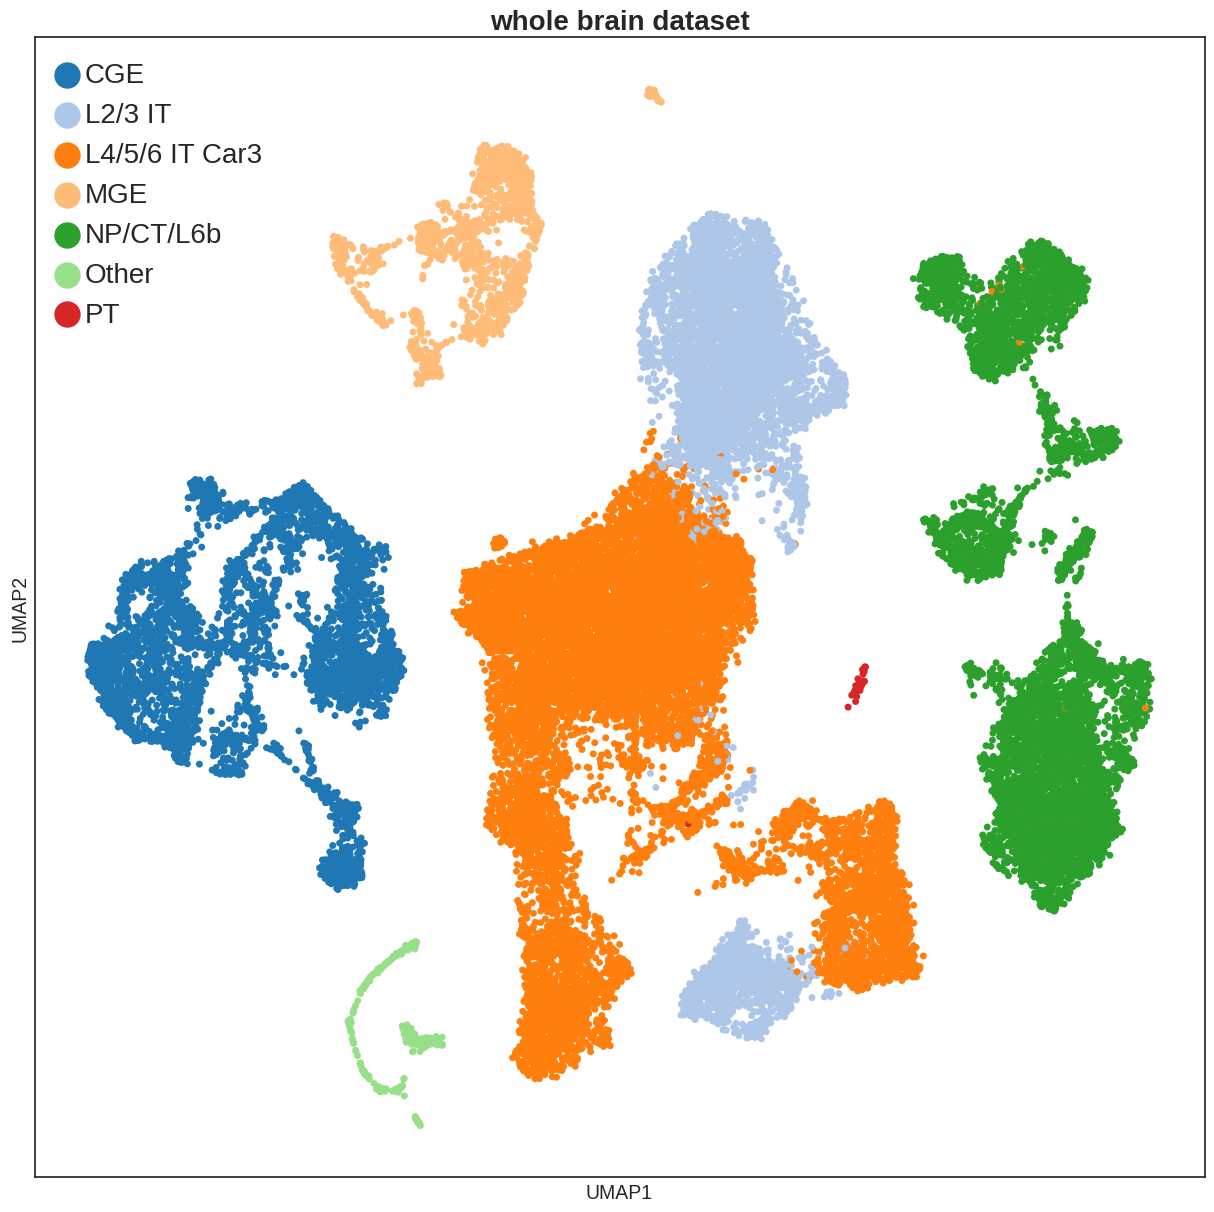

In [8]:
f,ax = plt.subplots(1,1,figsize=(15,15))
plt.style.use('seaborn-white')
sc.pl.umap(adata, color=['neighborhood'], size=50, 
           palette=sns.palettes.color_palette('tab20')+sns.palettes.color_palette('rainbow'),
          legend_fontoutline=1, ax=ax, show=False, legend_fontsize=20,s=100,
          )

plt.legend(markerscale=3, loc='best',fontsize=20)
ax.set_title('whole brain dataset',fontdict={'size':20, 'fontweight':'bold'})
plt.savefig('./MOs_FRP dataset.png', dpi=200,bbox_inches='tight')

In [38]:
# cluster_label_vc = adata.obs['cluster_label'].value_counts()
# cluster_label_vc = cluster_label_vc[cluster_label_vc>500]
# tmp = adata.obs[adata.obs.cluster_label.isin(cluster_label_vc.index.tolist())]
# adata1 = adata[tmp.index, :]
# adata1
# with rc_context({'figure.figsize': (15, 15)}):
#     sc.pl.umap(adata1, color=['cluster_label'], size=50, palette='tab20')
# cluster_label_vc

In [56]:
sc.tl.rank_genes_groups(adata, groupby='neighborhood',
                        method='t-test', pts=True, 
                       max_iter=1000)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:01:39)


In [63]:
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
tmp = pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals', 'logfoldchanges']}).head(20)

tmp.to_csv('./top20_DE.csv', sep=',')
tmp

,CGE_n,CGE_p,CGE_l,L2/3 IT_n,L2/3 IT_p,L2/3 IT_l,L4/5/6 IT Car3_n,L4/5/6 IT Car3_p,L4/5/6 IT Car3_l,MGE_n,...,MGE_l,NP/CT/L6b_n,NP/CT/L6b_p,NP/CT/L6b_l,Other_n,Other_p,Other_l,PT_n,PT_p,PT_l
0,Erbb4,0.0,7.231482,Enc1,0.0,2.083698,Nrn1,0.0,2.216087,Nxph1,...,4.793632,Hs3st4,0.0,4.187637,Qk,1.184604e-158,5.407990,Nos1ap,2.294931e-32,1.979884
1,Adarb2,0.0,8.864335,Fam19a1,0.0,3.578690,Rorb,0.0,4.936870,Grip1,...,2.955423,Pcp4,0.0,3.305866,Olig1,2.915226e-109,11.171199,Sorl1,3.340448e-31,1.961278
2,Gad1,0.0,6.062637,Meis2,0.0,2.548371,Cnih3,0.0,2.774710,Gad2,...,3.973745,Cdh18,0.0,3.547398,Malat1,2.806127e-107,1.422828,Hcn1,8.302032e-31,2.236492
3,Tcf4,0.0,1.923907,Dgkb,0.0,2.036664,Lmo4,0.0,1.738806,Slc6a1,...,3.839685,Tle4,0.0,4.231423,Erbb4,5.165390e-104,3.711452,Pex5l,1.955222e-30,2.048572
4,Grip1,0.0,3.338355,Atp2b1,0.0,1.277268,Lingo1,0.0,1.740689,Elavl2,...,2.405687,Fut9,0.0,1.795034,Tsc22d4,5.406714e-86,5.910808,Atp1b1,7.502942e-30,1.364395
5,Gad2,0.0,5.916988,Rasgrf2,0.0,2.459826,Tenm4,0.0,1.588383,Rab3b,...,5.329819,Bcl11b,0.0,3.011546,Sox10,2.817077e-82,12.328351,Gm28928,1.379416e-29,1.647201
6,Slc6a1,0.0,5.624026,Rgs6,0.0,1.717101,Fat3,0.0,1.960008,Sst,...,8.486224,Grik3,0.0,2.941158,Pllp,1.348891e-78,8.792646,Bcl11b,6.678947e-28,2.826771
7,Zfp536,0.0,5.950806,Lrrtm4,0.0,1.783449,St6galnac5,0.0,2.496577,Grin3a,...,4.953422,Slc1a2,0.0,1.507752,Gatm,2.153933e-76,6.743730,Ryr3,1.333311e-27,3.120745
8,Dlx6os1,0.0,6.559202,Slit3,0.0,2.009084,Bok,0.0,2.874570,Kcnc2,...,2.688293,Foxp2,0.0,5.668006,S100a16,8.455120e-69,12.856982,Ntng1,1.691795e-27,3.337877
9,Dner,0.0,3.944692,Nell2,0.0,1.458038,Foxp1,0.0,1.659675,Ptprm,...,3.501311,Efhd2,0.0,1.643987,Sh3d19,9.343068e-69,4.295763,Fam19a1,1.639369e-27,3.433944


In [78]:
# result = adata.uns['rank_genes_groups']
# groups = result['names'].dtype.names
# for group in groups[0:1]:
#     for key in ['names','pvals','logfoldchanges','pts', 'pts_rest','pvals_adj']:
#         tmp = pd.DataFrame({
#             'names': result['names'][group],
#             'pvals': result['pvals'][group],
#             'logfoldchanges': result['logfoldchanges'][group],
#             'pts': result['pts'][group][result['names'][group]],
#             'pts_rest': result['pts_rest'][group][result['names'][group]],
#             'pvals_adj': result['pvals_adj'][group],
#             'scores': result['scores'][group],
#         })
# #         tmp.to_csv('./ranking_genes_for_each_cluster_'+str(group)+'.csv', sep=',', index=None

In [79]:
# tmp

## gene marker test

In [67]:
gene_region_df= pd.read_csv('/home/xiongfeng/datasets/gene_region_df.csv', sep=',', index_col=0)
drop_list = []
for i in gene_region_df['gene']:
    if i not in adata.var.index.tolist():
        drop_list.append(i)
        
gene_region_df = gene_region_df[~gene_region_df.gene.isin(drop_list)]
gene_region_df

,gene,region
0,3110082J24Rik,MOs1
1,Pbx1,MOs1
3,Dcstamp,MOs1
6,1700006E09Rik,MOs1
8,Olfr655,MOs1
...,...,...
865,Adcyap1r1,FRP2/3
866,Prmt3,FRP2/3
867,1700104B16Rik,FRP2/3
868,Dscaml1,FRP2/3


In [76]:
gene_region_dict = {}
for i in gene_region_df['region'].unique():
    gene_region_dict[i] = list(gene_region_df.loc[gene_region_df.region==i, 'gene'])
gene_region_dict

{'MOs1': ['3110082J24Rik',
  'Pbx1',
  'Dcstamp',
  '1700006E09Rik',
  'Olfr655',
  'Nthl1',
  'Duoxa2',
  'Zfp341',
  'Mzf1',
  'Pus7l',
  'Lmx1a',
  'Pcyt1a',
  'Lyrm1',
  'Tnfsf9',
  'Mcat',
  'Sycp1',
  'Lctl',
  'Oosp1',
  'Taf1d',
  'Guca1a',
  'Dtwd1',
  'Cdc20',
  'Lias',
  'Mthfs'],
 'MOs2/3': ['B3gnt6',
  'Cdkal1',
  'Tab2',
  'E130307A14Rik',
  'Ankrd28',
  'Stat4',
  'Mpz',
  'Tnfsf10',
  'Slc41a2',
  'Tcea1',
  'Eif2b1',
  'Rnf115',
  'Galr3',
  'Socs4',
  'Lrrc39',
  'Haus7',
  'Vmn2r107'],
 'MOs5': ['Trpv2',
  'Tssc4',
  'Ido1',
  'Wdr62',
  'Atad5',
  'C330007P06Rik',
  'Cyp7b1',
  'Il7',
  'Mrps34',
  'Serac1',
  '2410089E03Rik',
  'Reep6',
  'Lrrc2',
  'Fam32a',
  'Atf5',
  'Rbl2',
  'Upk1a',
  'H3f3a',
  'Slc25a37',
  'Ift27',
  'Dnase1l1',
  'Ltbp4',
  'Ror1',
  'Alcam',
  'Zfr',
  'Slc30a1',
  'Bhlhe23',
  'Irs2',
  'Umodl1',
  'Olfr976',
  'Dapk3',
  'Slc39a1',
  'Enpp2',
  '4930595M18Rik',
  'Zfp46',
  'Myo6',
  'Ankrd13d',
  'Lrrc3b',
  'Etnk2',
  'Usp36',
  'Cl

In [80]:
sc.tl.rank_genes_groups(adata, groupby='leiden',
                        method='t-test', pts=True, 
                       max_iter=1000)


ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:07:27)


/home/xiongfeng/anaconda3/envs/graphmotif/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/home/xiongfeng/anaconda3/envs/graphmotif/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/home/xiongfeng/anaconda3/envs/graphmotif/lib/python3.7/site-packages/scanpy/tools/_rank_genes_gr

In [116]:
s_matrix = to_matrix(adata.uns['rank_genes_groups'])
# print(s_matrix, '\n', s_matrix.shape)
# s_matrix.to_csv(r'logs/matrix.csv', header=False, index=False)

dfc = s_matrix
dfm = gene_region_dict
cell_type_list = identify_cell(dfc[dfc.logfoldchanges >= 0.25], dfm)


/home/xiongfeng/anaconda3/envs/graphmotif/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/xiongfeng/anaconda3/envs/graphmotif/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/xiongfeng/anaconda3/envs/graphmotif/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

/home/xiongfeng/anaconda3/envs/graphmotif/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/xiongfeng/anaconda3/envs/graphmotif/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/xiongfeng/anaconda3/envs/graphmotif/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [117]:
cell_type_list

['FRP2/3',
 'FRP1',
 'FRP1',
 'FRP2/3',
 'MOs5',
 'FRP1',
 'FRP2/3',
 'FRP1',
 'FRP1',
 'FRP2/3',
 'FRP2/3',
 'FRP2/3',
 'MOs6b',
 'MOs6b',
 'FRP2/3',
 'FRP2/3',
 'FRP2/3',
 'FRP1',
 'FRP1',
 'FRP1',
 'MOs6b',
 'MOs6b',
 'FRP1',
 'FRP2/3',
 'MOs6a']

In [118]:
adata.obs['celltype']

cells
AAACCTGAGATGTTAG-L8TX_181206_01_H11    1
AAACCTGAGGCCGAAT-L8TX_181206_01_H11    8
AAACCTGGTAGAGCTG-L8TX_181206_01_H11    8
AAACCTGGTCACTTCC-L8TX_181206_01_H11    0
AAACCTGGTGATAAAC-L8TX_181206_01_H11    0
                                      ..
TTTGTCAGTTCAGACT-L8TX_181206_01_E12    2
TTTGTCATCGCAGGCT-L8TX_181206_01_E12    1
TTTGTCATCGGAGGTA-L8TX_181206_01_E12    0
TTTGTCATCTACCAGA-L8TX_181206_01_E12    4
TTTGTCATCTCAAGTG-L8TX_181206_01_E12    3
Name: celltype, Length: 33409, dtype: object

In [124]:
adata.obs['celltype'] = 'unk'
for k,i in enumerate(cell_type_list):
    adata.obs.loc[adata.obs.leiden==str(k), 'celltype'] = i
adata.obs

,region,class_label,neighborhood,subclass,cluster_label,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,celltype
cells,,,,,,,,,,,,
AAACCTGAGATGTTAG-L8TX_181206_01_H11,MOs_FRP,Glutamatergic,L2/3 IT,L2/3 IT CTX,167_L2/3 IT CTX,4745,4745,13068.0,0.0,0.0,1,FRP1
AAACCTGAGGCCGAAT-L8TX_181206_01_H11,MOs_FRP,GABAergic,MGE,Sst,98_Sst,3956,3956,9761.0,0.0,0.0,8,FRP1
AAACCTGGTAGAGCTG-L8TX_181206_01_H11,MOs_FRP,GABAergic,MGE,Sst,98_Sst,3554,3554,8226.0,0.0,0.0,8,FRP1
AAACCTGGTCACTTCC-L8TX_181206_01_H11,MOs_FRP,Glutamatergic,L4/5/6 IT Car3,L4/5 IT CTX,191_L4/5 IT CTX,4874,4874,14888.0,0.0,0.0,0,FRP2/3
AAACCTGGTGATAAAC-L8TX_181206_01_H11,MOs_FRP,Glutamatergic,L4/5/6 IT Car3,L4/5 IT CTX,191_L4/5 IT CTX,5839,5839,20886.0,0.0,0.0,0,FRP2/3
...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTTCAGACT-L8TX_181206_01_E12,MOs_FRP,Glutamatergic,NP/CT/L6b,L6 CT CTX,290_L6 CT CTX,4841,4841,14829.0,0.0,0.0,2,FRP1
TTTGTCATCGCAGGCT-L8TX_181206_01_E12,MOs_FRP,Glutamatergic,L2/3 IT,L2/3 IT CTX,168_L2/3 IT CTX,5380,5380,19067.0,0.0,0.0,1,FRP1
TTTGTCATCGGAGGTA-L8TX_181206_01_E12,MOs_FRP,Glutamatergic,L4/5/6 IT Car3,L4/5 IT CTX,187_L4/5 IT CTX,5403,5403,17357.0,0.0,0.0,0,FRP2/3


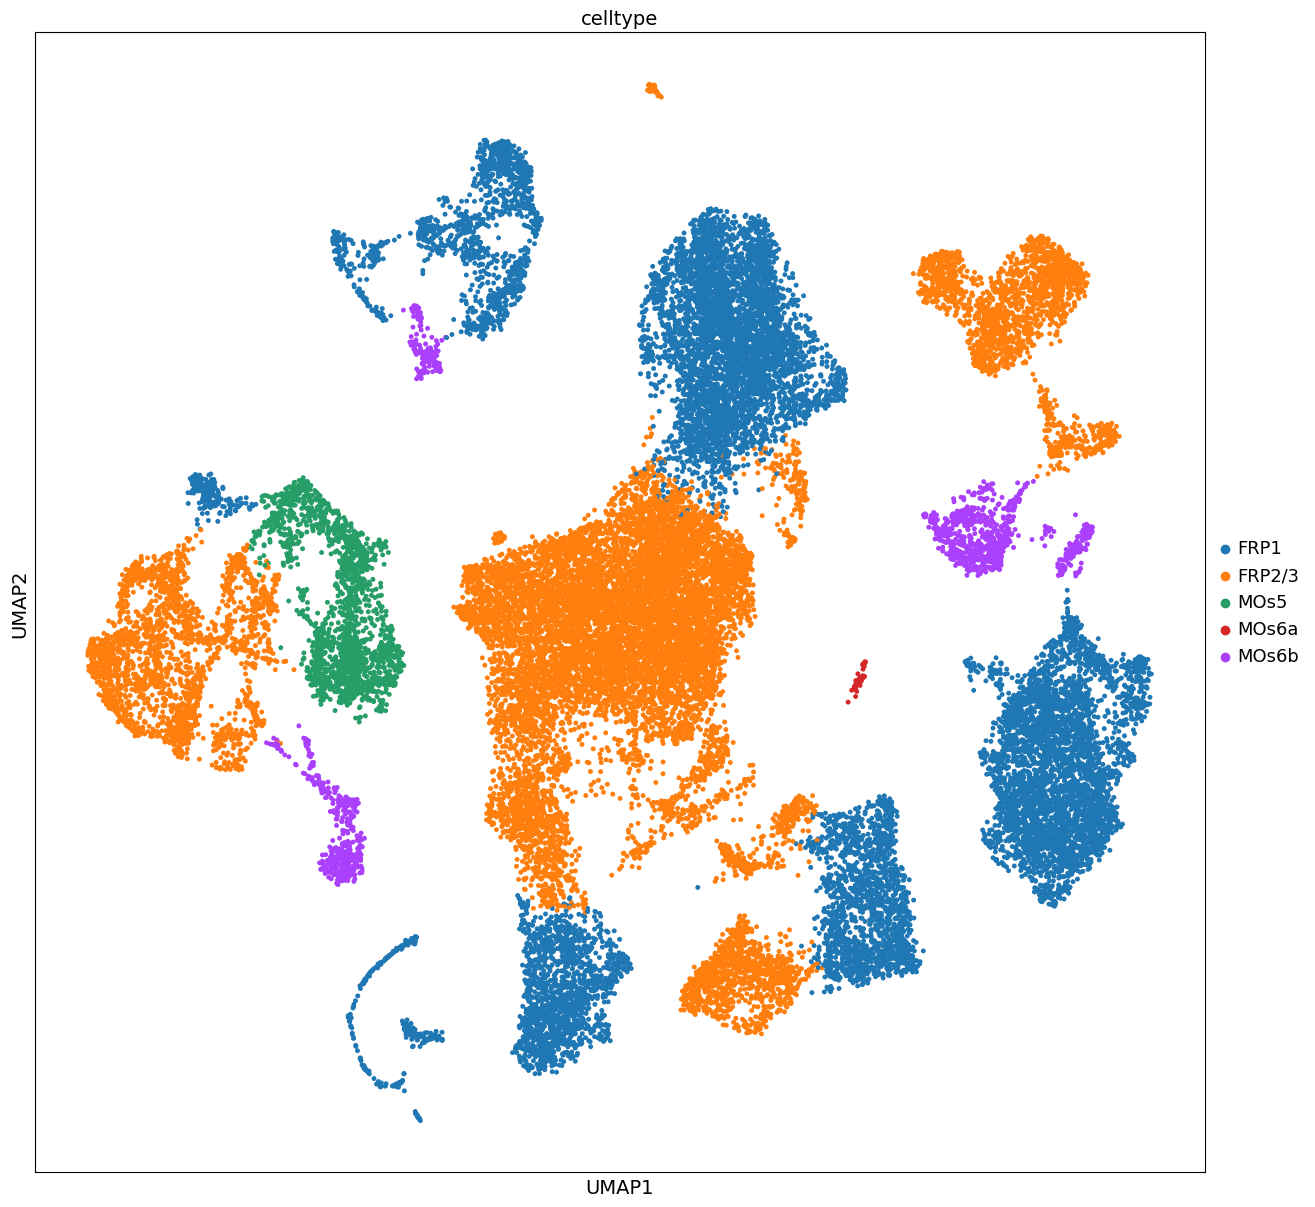

In [125]:
with rc_context({'figure.figsize': (15, 15)}):
    sc.pl.umap(adata, color=['celltype'], size=50)

In [104]:
def make_list(lenth, cluster_num):
    o_list = []
    for i in range(lenth):
        o_list.append(i % cluster_num)
    return pd.DataFrame(o_list)

def to_matrix(dic):
    cluster_num = pd.DataFrame(dic['names']).values.shape[1]
    i1 = pd.DataFrame(pd.DataFrame(dic['names']).values.reshape(-1))
    i2 = pd.DataFrame(pd.DataFrame(dic['pvals']).values.reshape(-1))
    i3 = pd.DataFrame(pd.DataFrame(dic['logfoldchanges']).values.reshape(-1))
    i4 = pd.DataFrame(pd.DataFrame(dic['pvals_adj']).values.reshape(-1))
    i5 = pd.DataFrame(pd.DataFrame(dic['scores']).values.reshape(-1))
    i6 = make_list(len(i1), cluster_num)
#     print((i1.shape, i2.shape, i3.shape, i4.shape, i5.shape, i6.shape))
    matrix = pd.concat([i1, i2, i3, i4, i5, i6], axis=1)
    matrix.columns = ['names', 'pvals', 'logfoldchanges', 'pvals_adj', 'scores', 'cluster']
#     print('matrix shape:' + f'{matrix.shape}')
    return matrix

# 输入qc后的df
def identify_cell(df_c, dic_m): # df_c是rank result, df_m: gene region dict
    # 群数量
    cluster_num = len(set(df_c['cluster'].values))
    # cell_type数量
    cell_type_num = len(dic_m.keys())
    # 最终细胞类型
    cell_type_list = ['unknown'] * cluster_num
    # 匹配判断矩阵，0记录cell_type，1记录匹配数，2记录logfoldchanges计算值
    match_scores = [[['unknown', 0.0, 0] for _ in range(cell_type_num)] for _ in range(cluster_num)]
    # 对聚类群进行marker基因匹配
    for cluster_index in range(cluster_num):
        # 群
        cluster = df_c[df_c.cluster == cluster_index]
        # 群基因组
        cluster_genes = cluster.names.values
        # 群差异倍数归一化
        cluster.logfoldchanges = (cluster.logfoldchanges - cluster.logfoldchanges.min()) / (cluster.logfoldchanges.max() - cluster.logfoldchanges.min())
        # 查cell_type表的marker基因, 更新匹配判断矩阵
        for cell_type_index, cell_type in enumerate(dic_m.keys()):
#             print(cluster_index, cell_type_index, cell_type)
            match_scores[cluster_index][cell_type_index][0] = cell_type
#             print(match_scores[cluster_index][cell_type_index])
            
            # cell_type特异的基因
            cell_type_genes = dic_m[cell_type]
            # cell_type匹配基因个数
            match_num = 0
            # cell_type所属总基因个数
            all_gnum = len(cell_type_genes)
            # cell_type匹配基因列表
            match_g = []
            # 查单个cell的marker基因匹配个数
            for g in cell_type_genes:
                if g in cluster_genes:
                    match_num += 1
                    match_g.append(g)
            # if match_num == all_gnum:
            #     cell_type_list[cluster_index] = cell_type
            #     print('full match')
            #     break
            if match_num != 0:
                # match_scores[cluster_index][cell_type_index][0] = cell_type
                match_scores[cluster_index][cell_type_index][1] = match_num / all_gnum
                scores = []
                for g in match_g:
                    g_foldchanges = cluster[cluster['names'] == g].logfoldchanges.values
                    scores.append(g_foldchanges)
                sum(pp.minmax_scale(scores))/len(scores)
#                 print(f'scores_list:{scores}')
                scores = sum(scores) / len(scores)
#                 print(f'scores:{scores}')
                match_scores[cluster_index][cell_type_index][2] = scores
        if cell_type_list[cluster_index] == 'unknown':
            # 最大匹配数
            mn = 0
            # 差异倍数评分
            ms = 0
            # 遍历该群匹配判断矩阵，更新cell_type
            for match_l in match_scores[cluster_index]:
                if match_l[0] != 'unknown':
#                     print(match_l[0])
                    if match_l[1] > mn:
                        mn = match_l[1]
                        cell_type_list[cluster_index] = match_l[0]
                    elif match_l[2] > ms:
                        ms = match_l[2]
                        cell_type_list[cluster_index] = match_l[0]
#     print(match_scores)
#     print(len(match_scores), len(match_scores[0]))
#     print(cell_type_list)
    # print(cell_type_list)
    return cell_type_list


In [134]:
all_gnum

594

In [133]:
len(cell_type_genes)

594

In [132]:
match_num

594

In [126]:
# 群数量
cluster_num = len(set(df_c['cluster'].values))
# cell_type数量
cell_type_num = len(dic_m.keys())
# 最终细胞类型
cell_type_list = ['unknown'] * cluster_num
# 匹配判断矩阵，0记录cell_type，1记录匹配数，2记录logfoldchanges计算值
match_scores = [[['unknown', 0.0, 0] for _ in range(cell_type_num)] for _ in range(cluster_num)]
# 对聚类群进行marker基因匹配
for cluster_index in range(cluster_num):
    # 群
    cluster = df_c[df_c.cluster == cluster_index]
    # 群基因组
    cluster_genes = cluster.names.values
    # 群差异倍数归一化
    cluster.logfoldchanges = (cluster.logfoldchanges - cluster.logfoldchanges.min()) / (cluster.logfoldchanges.max() - cluster.logfoldchanges.min())
    # 查cell_type表的marker基因, 更新匹配判断矩阵
    for cell_type_index, cell_type in enumerate(dic_m.keys()):
#             print(cluster_index, cell_type_index, cell_type)
        match_scores[cluster_index][cell_type_index][0] = cell_type
#             print(match_scores[cluster_index][cell_type_index])
        cell_type_genes = dic_m[cell_type]
        # cell_type匹配基因个数
        match_num = 0
        # cell_type所属总基因个数
        all_gnum = len(cell_type_genes)
        # cell_type匹配基因列表
        match_g = []
        # 查单个cell的marker基因匹配个数
        for g in cell_type_genes:
            if g in cluster_genes:
                match_num += 1
                match_g.append(g)
        # if match_num == all_gnum:
        #     cell_type_list[cluster_index] = cell_type
        #     print('full match')
        #     break
        if match_num != 0:
            # match_scores[cluster_index][cell_type_index][0] = cell_type
            match_scores[cluster_index][cell_type_index][1] = match_num / all_gnum
            scores = []
            for g in match_g:
                g_foldchanges = cluster[cluster['names'] == g].logfoldchanges.values
                scores.append(g_foldchanges)
            sum(pp.minmax_scale(scores))/len(scores)
#                 print(f'scores_list:{scores}')
            scores = sum(scores) / len(scores)
#                 print(f'scores:{scores}')
            match_scores[cluster_index][cell_type_index][2] = scores
    if cell_type_list[cluster_index] == 'unknown':
        # 最大匹配数
        mn = 0
        # 差异倍数评分
        ms = 0
        # 遍历该群匹配判断矩阵，更新cell_type
        for match_l in match_scores[cluster_index]:
            if match_l[0] != 'unknown':
#                     print(match_l[0])
                if match_l[1] > mn:
                    mn = match_l[1]
                    cell_type_list[cluster_index] = match_l[0]
                elif match_l[2] > ms:
                    ms = match_l[2]
                    cell_type_list[cluster_index] = match_l[0]


/home/xiongfeng/anaconda3/envs/graphmotif/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/xiongfeng/anaconda3/envs/graphmotif/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/xiongfeng/anaconda3/envs/graphmotif/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

/home/xiongfeng/anaconda3/envs/graphmotif/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/xiongfeng/anaconda3/envs/graphmotif/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/xiongfeng/anaconda3/envs/graphmotif/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [129]:
(match_scores)

[[['MOs1', 1.0, array([0.5195376], dtype=float32)],
  ['MOs2/3', 1.0, array([0.5559491], dtype=float32)],
  ['MOs5', 1.0, array([0.55362743], dtype=float32)],
  ['MOs6a', 1.0, array([0.552254], dtype=float32)],
  ['MOs6b', 1.0, array([0.5316671], dtype=float32)],
  ['FRP1', 1.0, array([0.5360731], dtype=float32)],
  ['FRP2/3', 1.0, array([0.53797734], dtype=float32)]],
 [['MOs1', 1.0, array([0.52390563], dtype=float32)],
  ['MOs2/3', 1.0, array([0.56680316], dtype=float32)],
  ['MOs5', 1.0, array([0.5454933], dtype=float32)],
  ['MOs6a', 1.0, array([0.5503322], dtype=float32)],
  ['MOs6b', 1.0, array([0.5171516], dtype=float32)],
  ['FRP1', 1.0, array([0.525192], dtype=float32)],
  ['FRP2/3', 1.0, array([0.5413357], dtype=float32)]],
 [['MOs1', 1.0, array([0.5257933], dtype=float32)],
  ['MOs2/3', 1.0, array([0.5383394], dtype=float32)],
  ['MOs5', 1.0, array([0.51793635], dtype=float32)],
  ['MOs6a', 1.0, array([0.53579104], dtype=float32)],
  ['MOs6b', 1.0, array([0.54315794], dtype=

In [7]:
adata = sc.read_h5ad('/home/xiongfeng/datasets/local_imputed.h5ad')
adata

AnnData object with n_obs × n_vars = 378918 × 7309
    obs: 'fov', 'center_x', 'center_y', 'min_x', 'max_x', 'min_y', 'max_y', 'age', 'clust_annot', 'slice', 'organism_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'cell_type_ontology_term_id', 'assay_ontology_term_id', 'tissue_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'donor_id', 'is_primary_data', 'cell_type_annot', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype'
    uns: 'batch_condition', 'schema_version', 'title'
    obsm: 'X_pca', 'X_spatial', 'X_umap', 'spatial'

In [14]:
adata.obs.iloc[1:2,0: 11]

,fov,center_x,center_y,min_x,max_x,min_y,max_y,age,clust_annot,slice,organism_ontology_term_id
125440231316715565354815908578409815654,0,-3696.887734636664,1475.0979892462492,-3702.4031345039607,-3691.372334769368,1470.12758936584,1480.0683891266583,4wk,InN-Calb2-1,0,NCBITaxon:10090


In [15]:
adata.obs.iloc[1:2,11: ]

,sex_ontology_term_id,suspension_type,cell_type_ontology_term_id,assay_ontology_term_id,tissue_ontology_term_id,disease_ontology_term_id,self_reported_ethnicity_ontology_term_id,development_stage_ontology_term_id,donor_id,is_primary_data,cell_type_annot,cell_type,assay,disease,organism,sex,tissue,self_reported_ethnicity,development_stage
125440231316715565354815908578409815654,PATO:0000383,na,CL:0000498,EFO:0008992,UBERON:0003112,PATO:0000461,na,MmusDv:0000048,MsBrainAgingSpatialDonor_1,False,InN,inhibitory interneuron,MERFISH,normal,Mus musculus,female,olfactory region,na,4 weeks


In [8]:
adata.obs['tissue'].value_counts()

striatum                 95601
cortical layer VI        72658
cortical layer V         67178
corpus callosum          53460
cortical layer II/III    45380
olfactory region         25996
pia mater                15834
brain ventricle           2811
Name: tissue, dtype: int64

In [26]:
adata.var

,feature_is_filtered,feature_name,feature_reference,feature_biotype
ENSMUSG00000018381,False,Abi3,NCBITaxon:10090,gene
ENSMUSG00000035783,False,Acta2,NCBITaxon:10090,gene
ENSMUSG00000020178,False,Adora2a,NCBITaxon:10090,gene
ENSMUSG00000024397,False,Aif1,NCBITaxon:10090,gene
ENSMUSG00000017390,False,Aldoc,NCBITaxon:10090,gene
...,...,...,...,...
ENSMUSG00000044647,False,Csrnp3,NCBITaxon:10090,gene
ENSMUSG00000097648,False,9330185C12Rik,NCBITaxon:10090,gene
ENSMUSG00000024238,False,Zeb1,NCBITaxon:10090,gene
ENSMUSG00000024501,False,Dpysl3,NCBITaxon:10090,gene


In [27]:
adata.to_df()

,ENSMUSG00000018381,ENSMUSG00000035783,ENSMUSG00000020178,ENSMUSG00000024397,ENSMUSG00000017390,ENSMUSG00000036777,ENSMUSG00000038115,ENSMUSG00000037010,ENSMUSG00000024411,ENSMUSG00000060802,...,ENSMUSG00000055761,ENSMUSG00000040612,ENSMUSG00000020160,ENSMUSG00000038872,ENSMUSG00000050711,ENSMUSG00000044647,ENSMUSG00000097648,ENSMUSG00000024238,ENSMUSG00000024501,ENSMUSG00000025754
296840548544172399853066257548860105346,-0.307775,-0.432807,-0.433810,-0.249633,2.727235,-0.391641,-0.348581,2.095861,1.809328,-0.462932,...,1.718954,-0.457109,-0.217691,-0.458128,-0.477738,-0.432707,-0.249225,-0.531427,-0.322837,-0.158588
125440231316715565354815908578409815654,-0.307775,-0.432807,1.588969,-0.249633,-0.714621,-0.391641,-0.348581,-0.377240,-0.334864,-0.462932,...,-0.488582,-0.457109,-0.217691,-0.458128,3.144008,-0.432707,-0.249225,2.353723,-0.322837,-0.158588
281867370064380610762953800107398502280,4.436142,1.850057,-0.433810,4.206398,-0.714621,2.230749,-0.348581,-0.377240,-0.334864,-0.462932,...,-0.488582,-0.457109,-0.217691,-0.458128,-0.477738,-0.432707,-0.249225,1.673118,-0.322837,-0.158588
317191079211317201281385704641177614171,-0.307775,-0.432807,-0.433810,-0.249633,-0.714621,3.462266,-0.348581,1.487585,-0.334864,0.836210,...,-0.488582,-0.457109,-0.217691,-0.458128,-0.477738,-0.432707,-0.249225,-0.531427,-0.322837,-0.158588
145186441853584143398162181590277934372,-0.307775,-0.432807,0.527103,-0.249633,0.069100,-0.391641,-0.348581,-0.377240,-0.334864,-0.462932,...,1.934895,1.124459,-0.217691,-0.458128,3.351700,-0.432707,-0.249225,-0.531427,-0.322837,-0.158588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336673865663781232877284032691751504893,-0.307775,-0.432807,-0.433810,-0.249633,1.079620,-0.391641,-0.348581,-0.377240,-0.334864,1.464624,...,-0.488582,-0.457109,-0.217691,-0.458128,-0.477738,-0.432707,-0.249225,1.648976,-0.322837,-0.158588
131117638919335084213290274068263613191,-0.307775,2.029190,-0.433810,-0.249633,2.380208,-0.391641,-0.348581,2.639781,2.280910,-0.462932,...,-0.488582,-0.457109,-0.217691,-0.458128,-0.477738,-0.432707,-0.249225,-0.531427,-0.322837,-0.158588
286679421147693250116014473271968370562,-0.307775,-0.432807,1.709050,-0.249633,-0.714621,-0.391641,-0.348581,-0.377240,-0.334864,-0.462932,...,-0.488582,-0.457109,-0.217691,-0.458128,-0.477738,-0.432707,-0.249225,-0.531427,-0.322837,-0.158588
109937064206098733862640606573911922907,-0.307775,-0.432807,2.718475,-0.249633,-0.714621,-0.391641,-0.348581,-0.377240,-0.334864,-0.462932,...,-0.488582,-0.457109,-0.217691,-0.458128,-0.477738,-0.432707,-0.249225,1.579961,-0.322837,-0.158588
